# Lecture 12: July 19th, 2024

__Today:__
* Finish "Pythonic Code", Newton's Method
* Jessica will cover two more Matplotlib topics today. You should watch the final video ("Adjusting the Appearance") on your own! We will not be covering Matplotlib in lecture, but we will see some of it used today.
* Yasmeen will extend homework deadlines to Wednesday.

## f-strings – Pythonic Code 2 

In [1]:
name = "Yasmeen"
n = 13 

Event though I have `name` and `n` defined, if I try the following, they're just interpreted as strings.

In [2]:
"Hello, name, nice to meet you n times."

'Hello, name, nice to meet you n times.'

If I did want to use the variables, there are a few ways we can do that. I'm first going to show you some not-so-elegant ways.

In [3]:
print("Hello,",name,"nice to meet you",n,"times.")

Hello, Yasmeen nice to meet you 13 times.


This is pretty cumbersome. If I had a longer sentence, or more variables, this is not really something I'd want to do.

Notice there is a small mistake here:

In [4]:
print("Hello " + name + " nice to mee you " + n + "times.")

TypeError: can only concatenate str (not "int") to str

The issue is that `n` is an integer. Luckily, there's an easy fix for this.

In [5]:
print("Hello, " + name + " nice to mee you " + str(n) + " times.")

Hello, Yasmeen nice to mee you 13 times.


### Older way to format strings

In [6]:
"Hello, {}, nice to meet you {} times".format(name,n)

'Hello, Yasmeen, nice to meet you 13 times'

Q: What's not-so-great about this method?

A: Need to keep in mind all of your variables for long string, _and_ the order that they appear in.

### Newer way to format strings

This is what we call an "f-string"

In [7]:
f"Hello, {name}, nice to meet you {n} times."

'Hello, Yasmeen, nice to meet you 13 times.'

Here are some other ways we can format strings. These examples are not super important, they're just meant to show you an example of what's out there.

In [8]:
m = 3**20
m

3486784401

In [9]:
f"{m}"

'3486784401'

In [10]:
f"{m:e}" #sci. notation

'3.486784e+09'

In [11]:
#4 decimal places, float
f"{m:.4f}"

'3486784401.0000'

In [12]:
1/m

2.8679719907924413e-10

In [13]:
f"{1/m:.4f}"

'0.0000'

In [14]:
f"{1/m:.15f}"

'0.000000000286797'

In [15]:
z = 17

In [16]:
f"{z:b}" #b for binary

'10001'

## lambda functions – Pythonic Code 3 

A few comments before we get started:

* These should make you think of function handles from MATLAB.
* Sometimes lambda functions are called nameless/anonymous functions – in practice, you don't usually name these functions, but we'll be naming them in lecture for teaching purposes.
* Lambda functions can have _any_ number of arguments, but the code must take up a single line.
* Similar to function handles, they are often used as inputs to other functions, or maybe used just once in the code.

***

* Write a function `cap` that takes as input a string `s`, and as output returns the same string capitalized.

Let's first try this by writing a regular function. Notice it takes a single line.

In [17]:
def cap(s):
    return s.capitalize()

In [18]:
cap("hello")

'Hello'

In [19]:
cap("picasso")

'Picasso'

Let's now try to write this same function with a lambda function.

In [20]:
cap = lambda s: s.capitalize()

In [21]:
cap("sammy")

'Sammy'

In [22]:
cap("bandit")

'Bandit'

* Write a function `plus` that takes two inputs and adds them together.

We don't really need a function to do this, but it's just for practice with multiple arguments.

In [23]:
plus = lambda x,y: x+y

In [24]:
plus(5,3)

8

In [25]:
plus("hello, ", "world")

'hello, world'

* Make a $20 \times 3$ NumPy array of random letters, then concatenate each row of three letters into a single length-3 string using `np.apply_along_axis`.

In [26]:
import numpy as np
import string #comes with Python

In [27]:
rng = np.random.default_rng()

In [28]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_sentinel_dict',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [29]:
#dir(np)
#commented out because so large

In [30]:
letters = string.ascii_letters
letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [31]:
type(letters)

str

The following code is close, but will throw an error. See if you can spot it.

In [32]:
rng.choice(letters,size=(20,3))

ValueError: a must be a sequence or an integer, not <class 'str'>

The issue here is that `letters` is a string. We can easily fix this by converting it to a list.

In [33]:
arr = rng.choice(list(letters),size=(20,3))
arr

array([['P', 'f', 'R'],
       ['u', 'F', 'W'],
       ['F', 'p', 'V'],
       ['h', 'Z', 'K'],
       ['x', 'T', 'k'],
       ['d', 'A', 'T'],
       ['g', 'b', 'X'],
       ['q', 'L', 'U'],
       ['C', 'C', 'B'],
       ['a', 'l', 'y'],
       ['w', 'l', 'V'],
       ['G', 'm', 'P'],
       ['k', 'n', 'P'],
       ['E', 'g', 'Z'],
       ['I', 'G', 'R'],
       ['Y', 'v', 'f'],
       ['e', 'n', 'j'],
       ['H', 'k', 'k'],
       ['W', 'b', 'g'],
       ['s', 'h', 'u']], dtype='<U1')

Here's the basic idea of how we'll merge the columns.

In [34]:
arr[0]

array(['P', 'f', 'R'], dtype='<U1')

In [35]:
"".join(arr[0])

'PfR'

Now, we need to apply this idea to every row of `arr`.

In [36]:
np.apply_along_axis(lambda row: "".join(row),axis=1,arr=arr)

array(['PfR', 'uFW', 'FpV', 'hZK', 'xTk', 'dAT', 'gbX', 'qLU', 'CCB',
       'aly', 'wlV', 'GmP', 'knP', 'EgZ', 'IGR', 'Yvf', 'enj', 'Hkk',
       'Wbg', 'shu'], dtype='<U3')

* Let `tuplist` be the following list of tuples. Sort the list so that the numbers are increasing.

`[("A",50),("B",70),("C",100),("D",45)]`

In [37]:
tuplist = [("A",50),("B",70),("C",100),("D",45)]

In [38]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



The symbols `/,*` mean that I have to specify the keywords.

In [39]:
#nothing happens
sorted(tuplist)

[('A', 50), ('B', 70), ('C', 100), ('D', 45)]

In [40]:
tuplist[0][1]

50

In [41]:
tuplist[1][1]

70

I need to specify how I'd actually like to order `tuplist`

In [42]:
sorted(tuplist, key=lambda tup: tup[1])

[('D', 45), ('A', 50), ('B', 70), ('C', 100)]

What if I wanted to go in decreasing order?

In [43]:
sorted(tuplist, key=lambda tup: tup[1], reverse=True)

[('C', 100), ('B', 70), ('A', 50), ('D', 45)]

How could I sort by letters instead?

In [44]:
sorted(tuplist, key=lambda tup: tup[0])

[('A', 50), ('B', 70), ('C', 100), ('D', 45)]

In [45]:
sorted(tuplist, key=lambda tup: tup[0],reverse=True)

[('D', 45), ('C', 100), ('B', 70), ('A', 50)]

## Formatting a NumPy Array

We will use lambda functions and f-strings to format a NumPy array.

In [46]:
import numpy as np
rng = np.random.default_rng(seed=1)
arr = rng.normal(size = 100)

Maybe I don't like the exponential notation. Let's change that first.

In [47]:
help(np.set_printoptions)

Help on function set_printoptions in module numpy:

set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, suppress=None, nanstr=None, infstr=None, formatter=None, sign=None, floatmode=None, *, legacy=None)
    Set printing options.
    
    These options determine the way floating point numbers, arrays and
    other NumPy objects are displayed.
    
    Parameters
    ----------
    precision : int or None, optional
        Number of digits of precision for floating point output (default 8).
        May be None if `floatmode` is not `fixed`, to print as many digits as
        necessary to uniquely specify the value.
    threshold : int, optional
        Total number of array elements which trigger summarization
        rather than full repr (default 1000).
        To always use the full repr without summarization, pass `sys.maxsize`.
    edgeitems : int, optional
        Number of array items in summary at beginning and end of
        each dimension (default 

In [48]:
np.set_printoptions(formatter={'float':lambda x:f"{x:.4f}"})

In [49]:
arr

array([0.3456, 0.8216, 0.3304, -1.3032, 0.9054, 0.4464, -0.5370, 0.5811,
       0.3646, 0.2941, 0.0284, 0.5467, -0.7365, -0.1629, -0.4821, 0.5988,
       0.0397, -0.2925, -0.7819, -0.2572, 0.0081, -0.2756, 1.2941, 1.0067,
       -2.7112, -1.8890, -0.1748, -0.4222, 0.2136, 0.2173, 2.1178,
       -1.1120, -0.3776, 2.0428, 0.6467, 0.6631, -0.5140, -1.6481, 0.1675,
       0.1090, -1.2274, -0.6832, -0.0720, -0.9448, -0.0983, 0.0955,
       0.0356, -0.5063, 0.5937, 0.8912, 0.3208, -0.8182, 0.7317, -0.5014,
       0.8792, -1.0718, 0.9145, -0.0201, -1.2487, -0.3139, 0.0541, 0.2728,
       -0.9822, -1.1074, 0.1996, -0.4667, 0.2355, 0.7595, -1.6488, 0.2544,
       1.2246, -0.2975, -0.8108, 0.7522, 0.2534, 0.8959, -0.3452, -1.4818,
       -0.1100, -0.4458, 0.7753, 0.1936, -1.6308, -1.1952, 0.8838, 0.6798,
       -0.6402, -0.0010, 0.4456, 0.4684, 0.8762, 0.2565, -0.0948, -0.2588,
       1.0557, -2.2509, -0.1387, 0.0330, -1.4253, 0.3328])

Maybe now I want the columns to be lined up a little bit more nicely.

In [50]:
np.set_printoptions(formatter={'float':lambda x:f"{x:+.4f}"})

In [51]:
arr

array([+0.3456, +0.8216, +0.3304, -1.3032, +0.9054, +0.4464, -0.5370,
       +0.5811, +0.3646, +0.2941, +0.0284, +0.5467, -0.7365, -0.1629,
       -0.4821, +0.5988, +0.0397, -0.2925, -0.7819, -0.2572, +0.0081,
       -0.2756, +1.2941, +1.0067, -2.7112, -1.8890, -0.1748, -0.4222,
       +0.2136, +0.2173, +2.1178, -1.1120, -0.3776, +2.0428, +0.6467,
       +0.6631, -0.5140, -1.6481, +0.1675, +0.1090, -1.2274, -0.6832,
       -0.0720, -0.9448, -0.0983, +0.0955, +0.0356, -0.5063, +0.5937,
       +0.8912, +0.3208, -0.8182, +0.7317, -0.5014, +0.8792, -1.0718,
       +0.9145, -0.0201, -1.2487, -0.3139, +0.0541, +0.2728, -0.9822,
       -1.1074, +0.1996, -0.4667, +0.2355, +0.7595, -1.6488, +0.2544,
       +1.2246, -0.2975, -0.8108, +0.7522, +0.2534, +0.8959, -0.3452,
       -1.4818, -0.1100, -0.4458, +0.7753, +0.1936, -1.6308, -1.1952,
       +0.8838, +0.6798, -0.6402, -0.0010, +0.4456, +0.4684, +0.8762,
       +0.2565, -0.0948, -0.2588, +1.0557, -2.2509, -0.1387, +0.0330,
       -1.4253, +0.3

Maybe it looks a little cluttered with the plus signs, we could use a space instead.

In [52]:
np.set_printoptions(formatter={'float':lambda x:f"{x: .4f}"})

In [53]:
arr

array([ 0.3456,  0.8216,  0.3304, -1.3032,  0.9054,  0.4464, -0.5370,
        0.5811,  0.3646,  0.2941,  0.0284,  0.5467, -0.7365, -0.1629,
       -0.4821,  0.5988,  0.0397, -0.2925, -0.7819, -0.2572,  0.0081,
       -0.2756,  1.2941,  1.0067, -2.7112, -1.8890, -0.1748, -0.4222,
        0.2136,  0.2173,  2.1178, -1.1120, -0.3776,  2.0428,  0.6467,
        0.6631, -0.5140, -1.6481,  0.1675,  0.1090, -1.2274, -0.6832,
       -0.0720, -0.9448, -0.0983,  0.0955,  0.0356, -0.5063,  0.5937,
        0.8912,  0.3208, -0.8182,  0.7317, -0.5014,  0.8792, -1.0718,
        0.9145, -0.0201, -1.2487, -0.3139,  0.0541,  0.2728, -0.9822,
       -1.1074,  0.1996, -0.4667,  0.2355,  0.7595, -1.6488,  0.2544,
        1.2246, -0.2975, -0.8108,  0.7522,  0.2534,  0.8959, -0.3452,
       -1.4818, -0.1100, -0.4458,  0.7753,  0.1936, -1.6308, -1.1952,
        0.8838,  0.6798, -0.6402, -0.0010,  0.4456,  0.4684,  0.8762,
        0.2565, -0.0948, -0.2588,  1.0557, -2.2509, -0.1387,  0.0330,
       -1.4253,  0.3

## Mathematical Introduction to Newton's Method

![](../images/26.jpg)
![](../images/27.jpg)

Link to Desmos examples:

* <a href="https://www.desmos.com/calculator/oxn8f5bn8e"> $f(x)=x^3-2$ example </a>
* <a href="https://www.desmos.com/calculator/iimbderdld"> $f(x) = x^3-2x+2$ example </a>

## Applying at a good point

Let $f(x) = x^3 - 2x + 2$. Starting at $x_0 = -1.5$, apply Newton's method three times to estimate a root of $f$.

In [54]:
import matplotlib.pyplot as plt

In [55]:
f = lambda x: x**3-2*x+2

There are sophisticated ways of getting derivatives in python, but for this class we'll just code it by hand.

In [56]:
df = lambda x: 3*x**2-2

Remember: If my guess is $(x_0,f(x_0))$, the next point is given by $x_0 - \frac{f(x_0)}{f'(x_0)}$.

In [57]:
newt = lambda z: z - f(z)/df(z)

In [58]:
z = -1.5
reps = 3
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

In [59]:
arr

array([-1.5000, -1.8421, -1.7728, -1.7693])

In [60]:
f(arr)

array([ 1.6250, -0.5667, -0.0262, -0.0001])

Notice we did a pretty good job, since `f` of our last point is close to zero.

In [61]:
newt(-1.8421)

-1.7728264273412229

In [62]:
plt.style.use('seaborn-darkgrid')

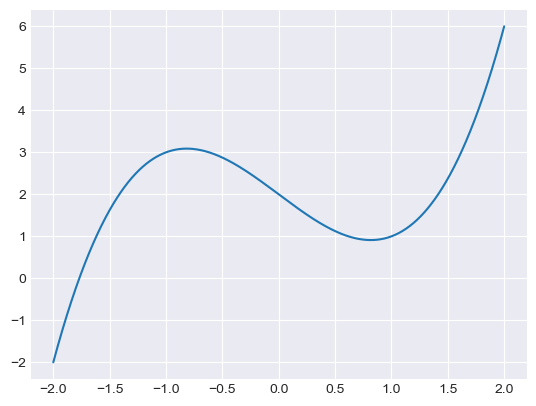

In [63]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));

## Applying at a worse point

Let $f(x) = x^3 - 2x + 2$. Starting at $x_0 = -0.5$, apply Newton's method three times to estimate a root of $f$.

In [64]:
z = -0.5
reps = 3
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

In [65]:
arr

array([-0.5000,  1.8000,  1.2518,  0.7120])

In [66]:
f(arr[-1])

0.9369290496425093

Notice, this is a much worse estimate than what we got before when we started at $x_0 = -1.5$.

Recall: The equation of the tangent line to $f(x)$ at $x_0$ is 
$$
y-f(x_0) = f'(x_0)(x - x_0).
$$
This gives
$$
y = f'(x_0)(x-x_0) + f(x_0).
$$

In [67]:
def tang(x0):
    return lambda x: df(x0)*(x-x0)+f(x0)

In [68]:
tang(arr[0])

<function __main__.tang.<locals>.<lambda>(x)>

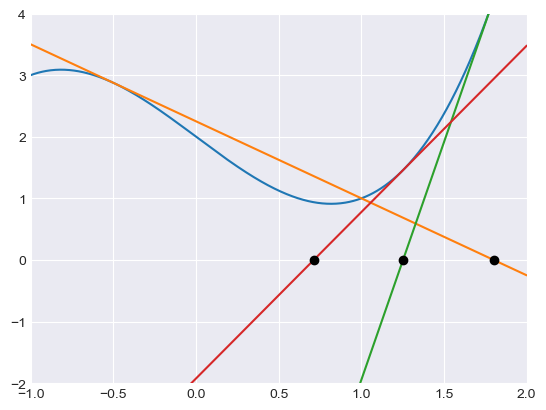

In [69]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    ax.plot(arr[i+1],0,'ko')
ax.set(xlim=(-1,2),ylim=(-2,4));

You can change the `reps` to 10, and notice that we don't converge to a zero.

Let's now look at the same plot, but for when we start at a good point: $x_0 = -1.5$.

In [70]:
z = -1.5
reps = 10
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

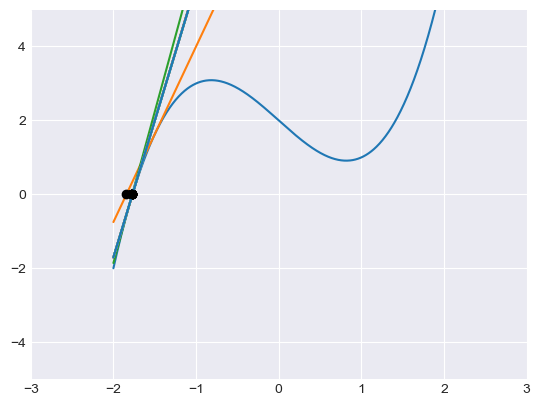

In [71]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    ax.plot(arr[i+1],0,'ko')
ax.set(xlim=(-3,3),ylim=(-5,5));

Remember when we tried this function with a start of $z=0$ in Desmos. Let's try it here.

In [72]:
z = 0
reps = 10
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

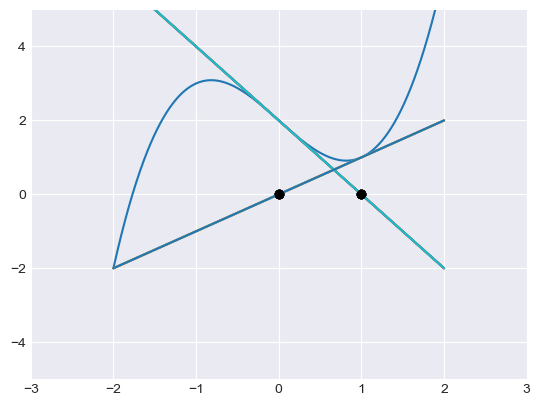

In [73]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    ax.plot(arr[i+1],0,'ko')
ax.set(xlim=(-3,3),ylim=(-5,5));

In [74]:
arr

array([ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
        1.0000,  0.0000,  1.0000,  0.0000])

Request from chat:

In [75]:
f = lambda x: (x-2)**4
df = lambda x: 4*(x-2)**3

In [76]:
z = 2
reps = 10
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

/var/folders/ct/dspwzk2n6kb19j3s9g3ldtc80000gn/T/ipykernel_33413/326974613.py:1: RuntimeWarning: invalid value encountered in double_scalars
  newt = lambda z: z - f(z)/df(z)


Notice! We get division by zero errors, since `df` is zero at `z=2`.

In [77]:
z = 1.5
reps = 10
arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

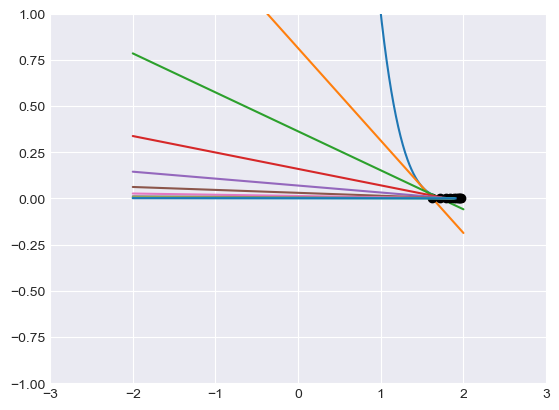

In [78]:
fig,ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    ax.plot(arr[i+1],0,'ko')
ax.set(xlim=(-3,3),ylim=(-1,1));

In [79]:
arr

array([ 1.5000,  1.6250,  1.7188,  1.7891,  1.8418,  1.8813,  1.9110,
        1.9333,  1.9499,  1.9625,  1.9718])

In [80]:
f(arr)

array([ 0.0625,  0.0198,  0.0063,  0.0020,  0.0006,  0.0002,  0.0001,
        0.0000,  0.0000,  0.0000,  0.0000])

***

We'll get to this on Monday!

## Analyzing Newton's Method

Let $f(x) = x^3 - 2x + 2$. For each value of $z$ in `np.linspace(-2,2,1000)`, apply Newton's method 7 times, and call the result $z_7$. For how many of these 100 values do we have $-0.001 < f(z_7) < 0.001$?